<a href="https://colab.research.google.com/github/kraigochieng/merge-sort-variations/blob/main/MergeSorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import random
import time
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    # Append remaining elements from left and right, if any
    for k in range(i, len(left)):
        result.append(left[k])

    for k in range(j, len(right)):
        result.append(right[k])

    return result


def basic_merge_sort(array):
    if len(array) <= 1:
        return array

    mid = len(array) // 2

    left_array = []
    for i in range(mid):
        left_array.append(array[i])

    right_array = []
    for i in range(mid, len(array)):
        right_array.append(array[i])

    left = basic_merge_sort(left_array)
    right = basic_merge_sort(right_array)

    return merge(left, right)


In [82]:
def top_down_merge_sort(data):
    if len(data) <= 1:
        return data

    mid = len(data) // 2

    left = []
    for i in range(mid):
        left.append(data[i])

    right = []
    for i in range(mid, len(data)):
        right.append(data[i])

    left = top_down_merge_sort(left)
    right = top_down_merge_sort(right)

    return merge(left, right)


def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    for k in range(i, len(left)):
        result.append(left[k])

    for k in range(j, len(right)):
        result.append(right[k])

    return result


In [83]:
def test_merge(
    test_num: int,
    input_size: int
):
  results = {
      "basic_time" : [],
      "top_down_time" : []
  }
  for test in tqdm(range(test_num)):
    print(f"Test: {test}\n--------")

    # 1. Create an array for both merge sorts
    array = list(range(1, input_size+1))
    basic_array = array.copy()
    random.shuffle(basic_array)
    top_down_array = array.copy()
    random.shuffle(top_down_array)
    # print(f"Basic Array : {basic_array} \nTop-Down Array : {top_down_array}")

    # 2. Basic Merge Sort
    basic_start = time.time()
    basic_sorted = basic_merge_sort(basic_array)
    basic_end = time.time()
    basic_duration = basic_end - basic_start

    # 3. Top-Down Merge Sort
    top_down_start = time.time()
    top_down_sorted = top_down_merge_sort(top_down_array)
    top_down_end = time.time()
    top_down_duration = top_down_end - top_down_start

    # 4. Print what's happening
    print(f"Basic Merge Sort Duration : {basic_duration:.4f} || Top-Down Merge Sort Duration : {top_down_duration:.4f}")

    # 5. Update Dictionary
    results["basic_time"].append(basic_duration)
    results["top_down_time"].append(top_down_duration)

  # 6. Return results
  return results




In [84]:
time_results = test_merge(
    10,
    1000
)

  0%|          | 0/10 [00:00<?, ?it/s]

Test: 0
--------
Basic Merge Sort Duration : 0.0117 || Top-Down Merge Sort Duration : 0.0088
Test: 1
--------
Basic Merge Sort Duration : 0.0091 || Top-Down Merge Sort Duration : 0.0046
Test: 2
--------
Basic Merge Sort Duration : 0.0063 || Top-Down Merge Sort Duration : 0.0046
Test: 3
--------
Basic Merge Sort Duration : 0.0045 || Top-Down Merge Sort Duration : 0.0047
Test: 4
--------
Basic Merge Sort Duration : 0.0061 || Top-Down Merge Sort Duration : 0.0047
Test: 5
--------
Basic Merge Sort Duration : 0.0062 || Top-Down Merge Sort Duration : 0.0050
Test: 6
--------
Basic Merge Sort Duration : 0.0066 || Top-Down Merge Sort Duration : 0.0048
Test: 7
--------
Basic Merge Sort Duration : 0.0046 || Top-Down Merge Sort Duration : 0.0045
Test: 8
--------
Basic Merge Sort Duration : 0.0045 || Top-Down Merge Sort Duration : 0.0045
Test: 9
--------
Basic Merge Sort Duration : 0.0054 || Top-Down Merge Sort Duration : 0.0045


In [85]:
time_results.keys()

dict_keys(['basic_time', 'top_down_time'])

In [86]:
def plot_durations(
    results: dict[str, list[float]]
):
  """Plot the durations of Basic and Top-Down Merge Sorts"""
  # Get the values from the dictionary
  basic_time = results["basic_time"]
  top_down_time = results["top_down_time"]

  # Get the number of tests ran
  test_num = range(len(basic_time))

  # Set the figure size
  plt.figure(figsize=(8, 6))

  # Plot the durations
  plt.plot(test_num, basic_time, label = "Basic Merge Sort Time")
  plt.plot(test_num, top_down_time, label = "Top-Down Merge Sort Time")
  plt.title("Basic and Top-Down Merge Sorts Durations")
  plt.xlabel("Number of Tests")
  plt.legend()

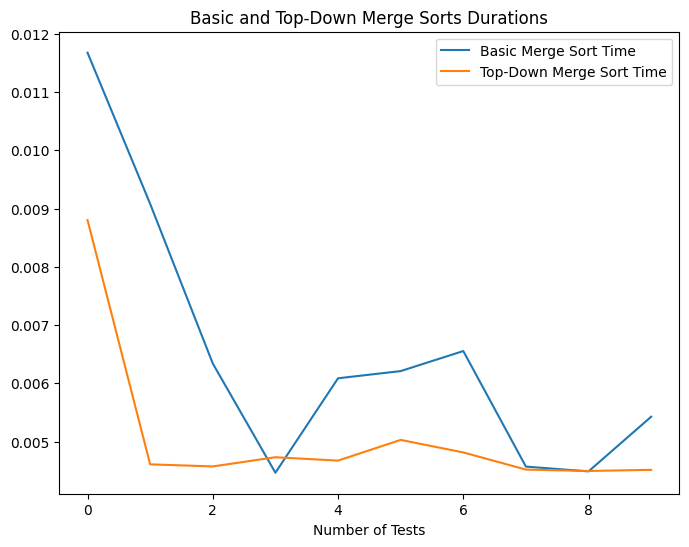

In [87]:
plot_durations(time_results)